In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Exploring Price (Target Variable)

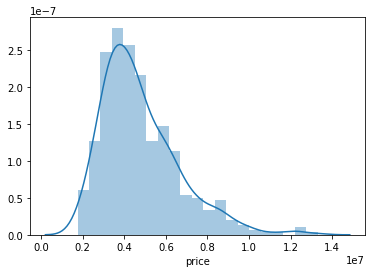

In [47]:
sns.distplot(df['price'])
plt.show()

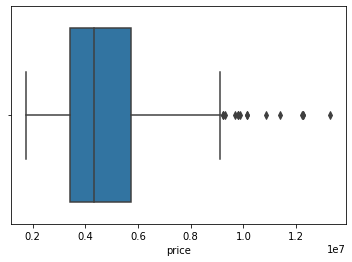

In [48]:
sns.boxplot(df['price'])
plt.show()

In [49]:
df['lprice'] = np.log(df['price'])

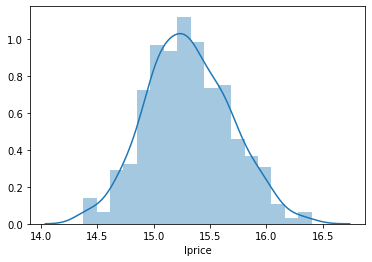

In [50]:
sns.distplot(df['lprice'])
plt.show()

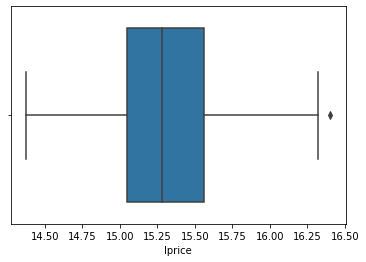

In [51]:
sns.boxplot(df['lprice'])
plt.show()

#### Exploring Area

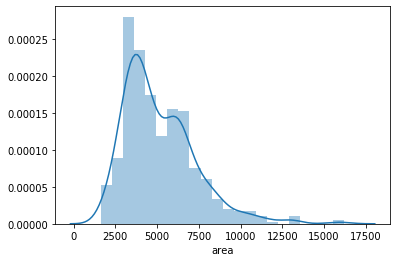

In [52]:
sns.distplot(df['area'])
plt.show()

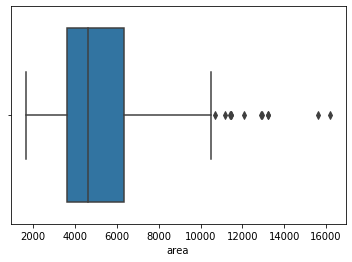

In [53]:
sns.boxplot(df['area'])
plt.show()

In [54]:
q1 = df['area'].quantile(0.25)
q3 = df['area'].quantile(0.75)
iqr = q3-q1

df = df[~(df['area']>(q3+1.5*iqr))]

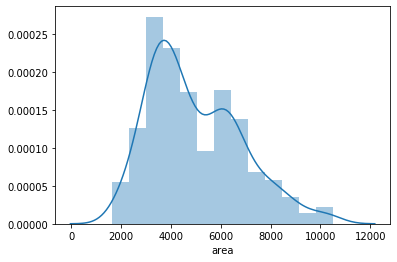

In [55]:
sns.distplot(df['area'])
plt.show()

#### Exploratory Data Analysis

###### Area and Price

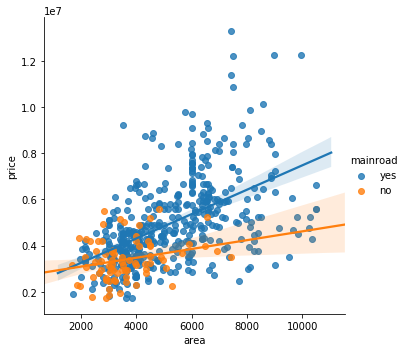

In [56]:
sns.lmplot(x='area', y='price', hue = 'mainroad', data=df)
plt.show()

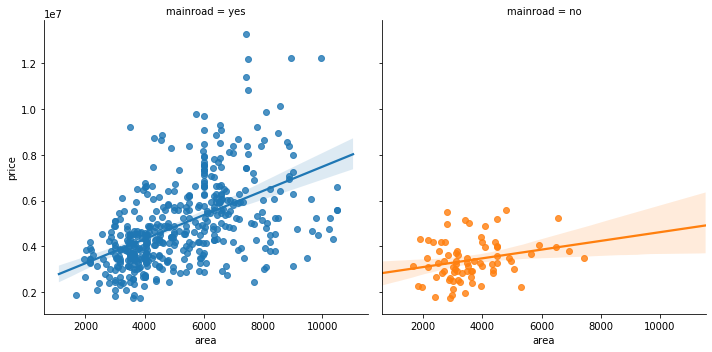

In [57]:
sns.lmplot(x='area', y='price', col='mainroad', hue = 'mainroad', data=df)
plt.show()

#### price and furnishingstatus

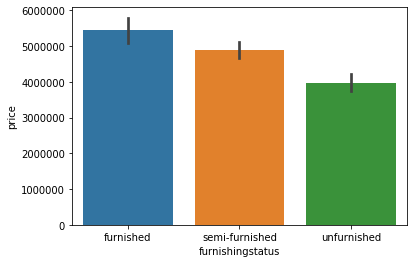

In [58]:
sns.barplot(x='furnishingstatus', y='price', data=df)
plt.show()

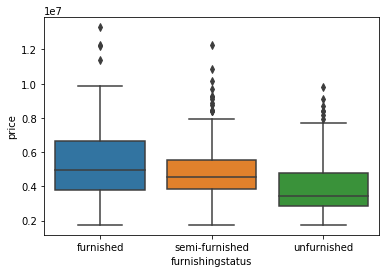

In [59]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.show()

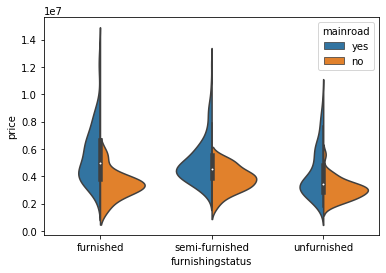

In [60]:
sns.violinplot(x='furnishingstatus', y='price', hue='mainroad',
               split=True, data=df)
plt.show()

### Model Building

In [61]:
df[['bathrooms', 'stories', 'parking']] = df[['bathrooms', 'stories', 'parking']].astype(object)

###### we will treat the above variables are object as the range values of the above varaibles were too less

In [62]:
df['furnishingstatus'].value_counts()

semi-furnished    223
unfurnished       176
furnished         134
Name: furnishingstatus, dtype: int64

In [63]:
cat_cols = list(df.select_dtypes(include='object').columns)
cat_cols

['bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [64]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 544
Data columns (total 21 columns):
price                              533 non-null int64
area                               533 non-null int64
bedrooms                           533 non-null int64
lprice                             533 non-null float64
bathrooms_2                        533 non-null uint8
bathrooms_3                        533 non-null uint8
bathrooms_4                        533 non-null uint8
stories_2                          533 non-null uint8
stories_3                          533 non-null uint8
stories_4                          533 non-null uint8
mainroad_yes                       533 non-null uint8
guestroom_yes                      533 non-null uint8
basement_yes                       533 non-null uint8
hotwaterheating_yes                533 non-null uint8
airconditioning_yes                533 non-null uint8
parking_1                          533 non-null uint8
parking_2                    

In [66]:
y = df['lprice']
yo = df['price']/100000
X = df.drop(['price', 'lprice'], axis=1)

In [67]:
yo.describe()

count    533.000000
mean      47.269952
std       18.512508
min       17.500000
25%       34.300000
50%       43.050000
75%       56.525000
max      133.000000
Name: price, dtype: float64

In [68]:
X = X.assign(const=1)

## Machine Learning

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

result = lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [71]:
print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.7274783723271575
R-square of Test:  0.6081771562513784


#### Application of RFE to reduce over-fitting

In [72]:
from sklearn.feature_selection import RFE

In [73]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=2)

rfe.fit(X, y)

y_pred = rfe.predict(X)
r2 = r2_score(y, y_pred)

cols = pd.DataFrame(list(zip(X.columns, rfe.support_, rfe.ranking_)), 
                   columns=['cols', 'select', 'rank'])

cols = cols[cols['select']==True]
cols = list(cols.loc[:,'cols'])
print(r2, cols)

0.031518475095419274 ['bathrooms_3', 'bathrooms_4']


In [74]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, KFold

params = [{'n_features_to_select': list(range(5,30))}]

lr = LinearRegression()
rfe = RFE(lr)

folds = KFold(n_splits=3, shuffle=True,  random_state=1)
model_cv = GridSearchCV(rfe, param_grid=params, cv=folds)

model_cv.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [5, 6, 7, 8, 9, 10, 11, 12,
                                                   13, 14, 15, 16, 17, 18, 19,
                                                   20, 21, 22, 23, 24, 25, 26,
                                                   27, 28, 29]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
model_cv.best_params_

{'n_features_to_select': 19}

In [76]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=19)

rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=19, step=1, verbose=0)

In [77]:
cols = pd.DataFrame(list(zip(X.columns, rfe.support_, rfe.ranking_)), 
                   columns=['cols', 'select', 'rank'])

In [78]:
cols = cols[cols['select']==True]
cols = list(cols.loc[:,'cols'])
cols

['area',
 'bedrooms',
 'bathrooms_2',
 'bathrooms_3',
 'bathrooms_4',
 'stories_2',
 'stories_3',
 'stories_4',
 'mainroad_yes',
 'guestroom_yes',
 'basement_yes',
 'hotwaterheating_yes',
 'airconditioning_yes',
 'parking_1',
 'parking_2',
 'parking_3',
 'prefarea_yes',
 'furnishingstatus_semi-furnished',
 'furnishingstatus_unfurnished']

In [79]:
from sklearn.model_selection import train_test_split

X_5 = X.loc[:, cols] 

X_train, X_test, y_train, y_test = train_test_split(X_5, y, 
                                    test_size=0.30, random_state=1)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

result = lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [80]:
print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.7274783723271576
R-square of Test:  0.6081771562513785


### Decision Tree Regressor

In [81]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
dt = DecisionTreeRegressor(min_samples_leaf=20, max_depth=7, random_state = 0)  
  
# fit the regressor with X and Y data 
dt.fit(X, yo) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

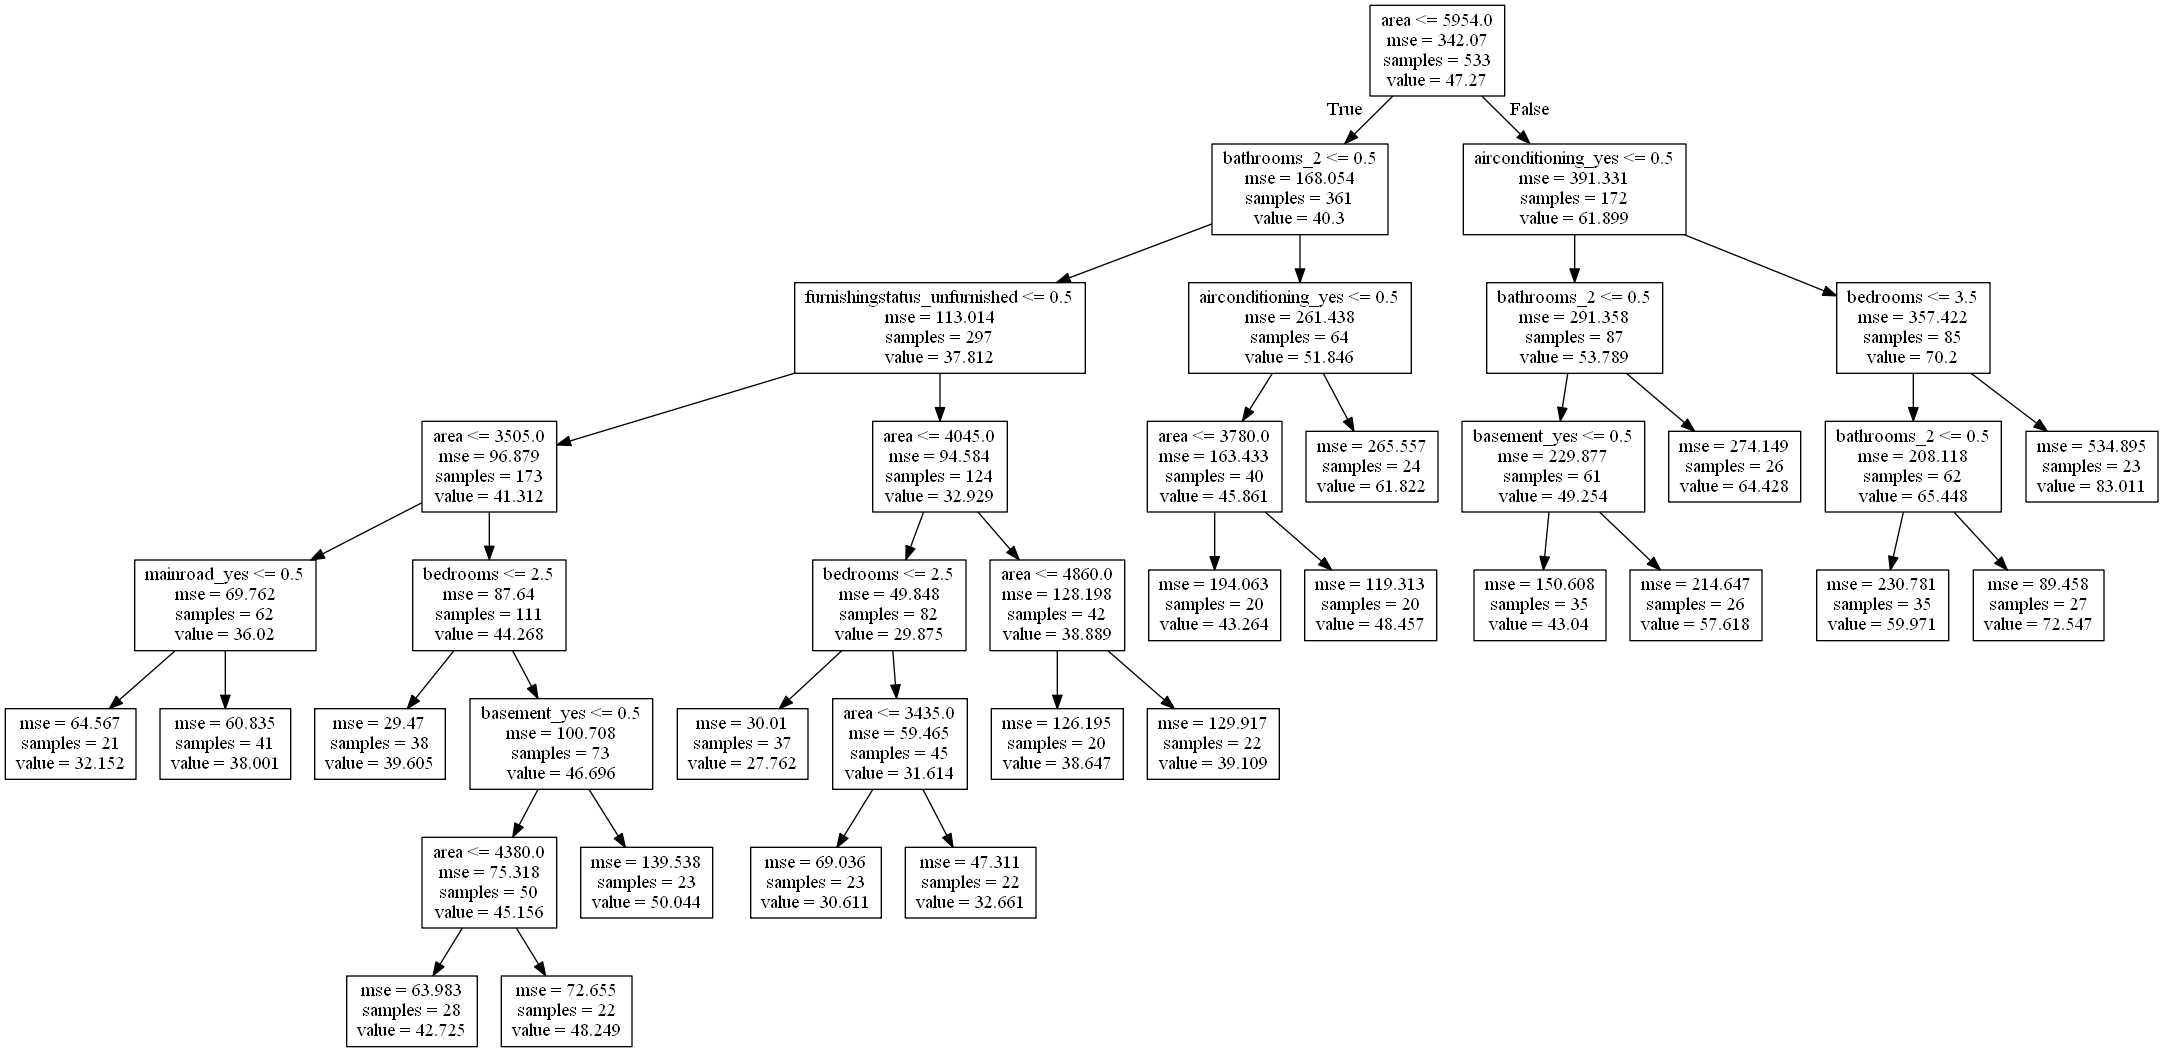

In [82]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Model Building

### Random Forest Regressor

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [88]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=1)

In [89]:
rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

In [90]:
print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.9326022390380673
R-square of Test:  0.43775375852143117


#### Hyperparameter Tuning

In [161]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfr = RandomForestRegressor(random_state=1)

param_dist = {'n_estimators':sp_randint(1, 200),
              'max_depth': sp_randint(1, 20),
              'min_samples_split': sp_randint(2, 40),
              'min_samples_leaf': sp_randint(2, 40)}

random_searchr = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=20, cv=5, random_state=1)
random_searchr.fit(X, y)

random_searchr.best_params_

{'max_depth': 14,
 'min_samples_leaf': 8,
 'min_samples_split': 27,
 'n_estimators': 179}

In [162]:
rfr = RandomForestRegressor(**random_searchr.best_params_, random_state=1)

rfr.fit(X_train, y_train)

y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.7128610503226933
R-square of Test:  0.46339831486857597


### LGBM Regressor

In [109]:
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor(n_estimators=10, random_state=1)

In [110]:
lgbmr.fit(X_train, y_train)

y_train_pred = lgbmr.predict(X_train)
y_test_pred = lgbmr.predict(X_test)

In [111]:
print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.594938079003993
R-square of Test:  0.3878966659713343


#### Hyperparameter Tuning

In [166]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

lgbmr = LGBMRegressor(n_estimators=10, random_state=1)

param_dist = {'n_estimators':sp_randint(1, 200),
              'max_depth': sp_randint(1, 20),
              'min_samples_split': sp_randint(2, 40),
              'min_samples_leaf': sp_randint(2, 40)}

random_searchl = RandomizedSearchCV(lgbmr, param_distributions=param_dist, n_iter=20, cv=5, random_state=1)
random_searchl.fit(X, y)

random_searchl.best_params_

{'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 19,
 'n_estimators': 9}

In [167]:
lgbmr = LGBMRegressor(**random_searchl.best_params_, random_state=1)

lgbmr.fit(X_train, y_train)

y_train_pred = lgbmr.predict(X_train)
y_test_pred = lgbmr.predict(X_test)

print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.4788022310304684
R-square of Test:  0.31768231374635036


## Stacking

In [168]:
from sklearn.ensemble import VotingRegressor
rfr = RandomForestRegressor(**random_searchr.best_params_)
lgbmr = LGBMRegressor(**random_searchl.best_params_)

er = VotingRegressor([('lr', lr), ('rf', rfr), ('lgbmr', lgbmr)])

er.fit(X_train, y_train)

y_train_pred = er.predict(X_train)
y_test_pred = er.predict(X_test)

print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))


R-square of Train:  0.6988087016264132
R-square of Test:  0.5298788207091079


### SVM Regressor

In [119]:
from sklearn.svm import SVR
svr = SVR()

In [120]:
svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [121]:
print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.37699487981864443
R-square of Test:  0.296193750864296


#### Hyperparameter Tuning

In [125]:
svr = SVR()

Cs = np.logspace(-4, 0, 10000)
gammas = np.logspace(0, 4, 10000)

param_grid = {'C':Cs, 'gamma':gammas}

rand_search = RandomizedSearchCV(svr, param_distributions=param_grid, cv=5, random_state=1) 

rand_search.fit(X, y)
rand_search.best_params_

{'gamma': 2.1818951824678767, 'C': 0.5469829603582053}

In [128]:
svr = SVR(**rand_search.best_params_)

svr.fit(X_train, y_train)

y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

print ('R-square of Train: ', r2_score(y_train, y_train_pred))
print ('R-square of Test: ', r2_score(y_test, y_test_pred))

R-square of Train:  0.8996028926100396
R-square of Test:  -0.011998141803976292
